# **Import Libraries and modules**

In [ ]:
# https://keras.io/
!pip install -q keras
import keras

In [1]:
# import all the necessary libraries 

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.
/home/pintu/.local/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


### Load pre-shuffled MNIST data into train and test sets

In [2]:
# load mnist data by keras api
# This does all the preprocessing while loading the data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


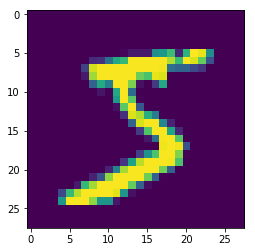

In [3]:
# pyplot is a python package used for plotting of images

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [4]:
# reshaping train and test data to channel last format

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [5]:
# 32 floating point precision and normalizing 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
# add model checkpoint
from keras.callbacks import ModelCheckpoint

In [10]:
filepath="weights-improvement-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [11]:
from keras.layers import Activation,BatchNormalization,Dropout,Dense
model = Sequential()

# since we have a upper limit of params as 20k we need to use 1x1 conv to bring down the channel size
# batch norm is added after conv, helps converge neural net faster
# Dropout is added as regularization, helps stopping overfitting 

# 3 conv blocks are (excluding 1x1)added to decrease input size
# dense layer is added at the end for classification to generalize all the conv filters output

# With this architecture we get 99.4 acc after 19 epoch

model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(32,1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16,1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.


/home/pintu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  del sys.path[0]


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
___________________________

/home/pintu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/home/pintu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


In [12]:
# loss function is categorical_crossentropy, based on loss function the weights are updated
# metric is used to judge the performance of the model after each epoch. Here we are using categorical_accuracy as metric, 
# before running we need to compile the model
# adam is a optimization algorithm which is used for weight updates

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
# With this architecture we get 99.4 acc after 19 epoch

model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1 , validation_data=(X_test, Y_test),callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.


/home/pintu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 176us/step - loss: 0.2603 - acc: 0.9197 - val_loss: 0.0523 - val_acc: 0.9846

Epoch 00001: val_acc improved from -inf to 0.98460, saving model to weights-improvement-01-0.9846.hdf5
Epoch 2/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.0851 - acc: 0.9737 - val_loss: 0.0370 - val_acc: 0.9880

Epoch 00002: val_acc improved from 0.98460 to 0.98800, saving model to weights-improvement-02-0.9880.hdf5
Epoch 3/30
60000/60000 [==============================] - 8s 141us/step - loss: 0.0695 - acc: 0.9784 - val_loss: 0.0414 - val_acc: 0.9849

Epoch 00003: val_acc did not improve from 0.98800
Epoch 4/30
60000/60000 [==============================] - 8s 141us/step - loss: 0.0584 - acc: 0.9816 - val_loss: 0.0270 - val_acc: 0.9904

Epoch 00004: val_acc improved from 0.98800 to 0.99040, saving model to weights-improvement-04-0.9904.hdf5
Epoch 5/30
60000/60000 [====

In [14]:
from keras.models import load_model
model = load_model('/home/pintu/Desktop/eva/weights-improvement-27-0.9947.hdf5')

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.01731959965056085, 0.9947]


In [16]:
print(score)

[0.01731959965056085, 0.9947]


In [17]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[1.8797213e-09 9.2185086e-09 2.0057389e-07 1.9529978e-06 9.6918459e-13
  9.8543569e-12 1.6932677e-12 9.9999785e-01 1.3932998e-10 3.4240708e-09]
 [1.0293224e-05 1.8503478e-06 9.9998403e-01 2.9038728e-07 9.9955662e-09
  5.9357606e-12 2.9596913e-06 1.5537455e-09 5.3418796e-07 2.4623681e-09]
 [2.8271996e-08 9.9999559e-01 4.9045099e-07 2.1731735e-07 7.0730431e-07
  1.2252579e-07 4.2447795e-07 2.4254937e-06 2.8287692e-08 1.7648819e-08]
 [9.9999440e-01 1.0499235e-12 9.1089936e-09 8.7334695e-10 7.0709124e-12
  3.6005108e-09 5.0700614e-06 3.1191147e-10 4.3299235e-07 3.3436834e-08]
 [1.4443159e-10 2.3841387e-09 1.7784373e-10 3.1852784e-12 9.9999559e-01
  6.1193051e-11 3.8479793e-09 6.1227206e-09 7.0595078e-08 4.3060795e-06]
 [1.6620641e-08 9.9999440e-01 7.4495119e-07 1.3166053e-08 1.1533838e-06
  1.1391379e-08 2.2647778e-07 3.5381606e-06 2.0190228e-08 3.5155310e-08]
 [3.8402566e-11 1.0513934e-06 5.3034807e-08 2.7223085e-11 9.9992180e-01
  3.3981205e-08 6.4363642e-10 9.6357835e-06 3.1314885e-05 

In [19]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()